In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [3]:
import yt
from yt.units import second, g, cm ,dyne
G = 6.674e-8*cm**3/second**2/g
ctr= 2.5e18*cm


def _r(field,data):
    r = sqrt((data["x"]-ctr)**2+(data["y"]-ctr)**2+(data["z"]-ctr)**2)
    return r
# def _v_mag(field,data):
#     return sqrt(data['velocity_x']**2+data['velocity_y']**2+data['velocity_z']**2)
def _omega(field,data):
    return sqrt(data['velocity_x']**2+data['velocity_y']**2+data['velocity_z']**2)/data["r"]
yt.add_field("r",function= _r,units="cm")
# yt.add_field("v_mag",function= _v_mag,units="cm/second")
yt.add_field("omega",function= _omega,units="1/s")

In [4]:
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    if particle : 
        data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)
        pcl_indx_at_t = np.where(np.isclose(int(ds.current_time.in_cgs()),data[:,1]))[0]
        print "Number of sink particles: " , len(pcl_indx_at_t)
        pcl_pos_at_t = data[pcl_indx_at_t,2:5]
        for pos in pcl_pos_at_t:
            slc.annotate_marker(pos, coord_system='data',marker='.',plot_args={'color':'black','s':3})
    slc.show()

In [5]:
def plot_omega(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="omega"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()

In [6]:
def compute_omega(beta):
    M =  4.53382324263e+36
    G= 6.67e-8
    rmax = 16.9
    return sqrt(3*G*M*beta/(rmax/1.057e-17)**3)

### $\beta = 0.1 $

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



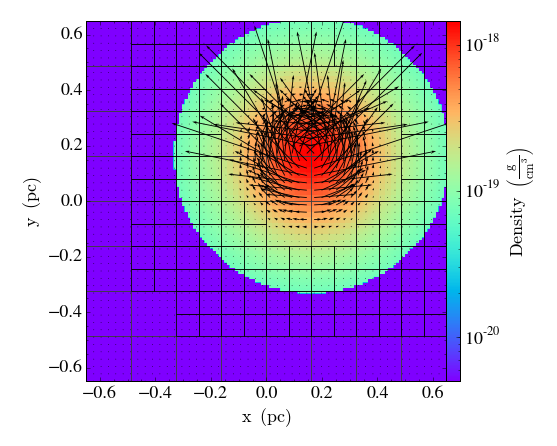

In [6]:
plot_dens(0,grid=True,velocity=True)


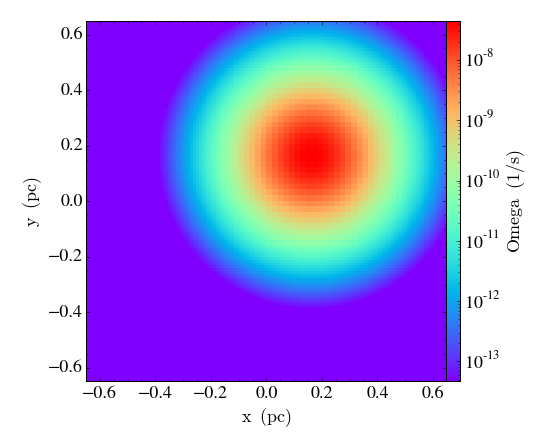

In [8]:
plot_omega(0)

Fixed center and also intialization code 

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



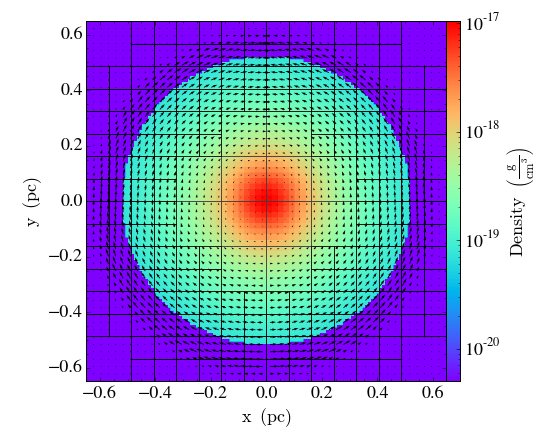

In [6]:
plot_dens(0,grid=True,velocity=True)


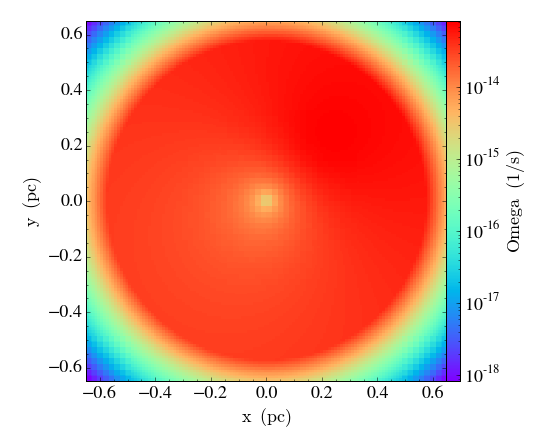

In [9]:
plot_omega(0)

#### Make box even bigger 

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



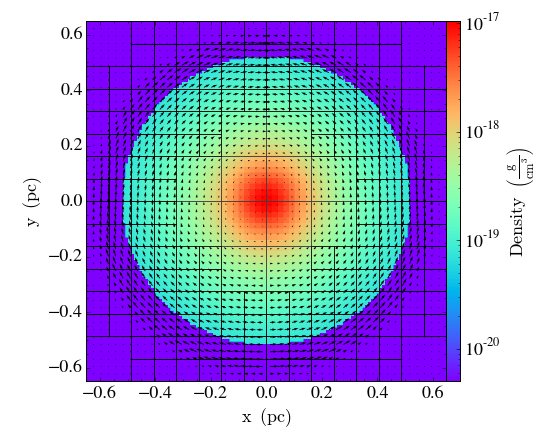

In [7]:
plot_dens(0,grid=True,velocity=True)


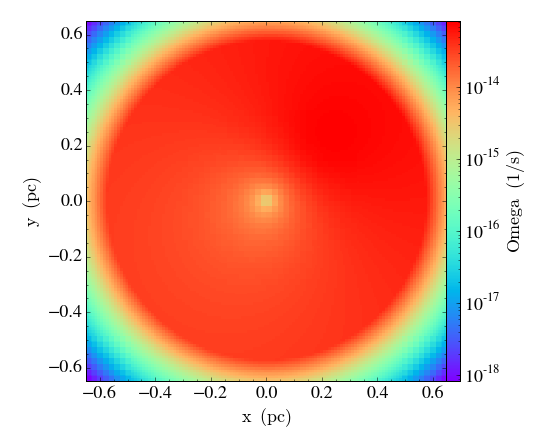

In [8]:
plot_omega(0)

#### Make box even bigger 

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



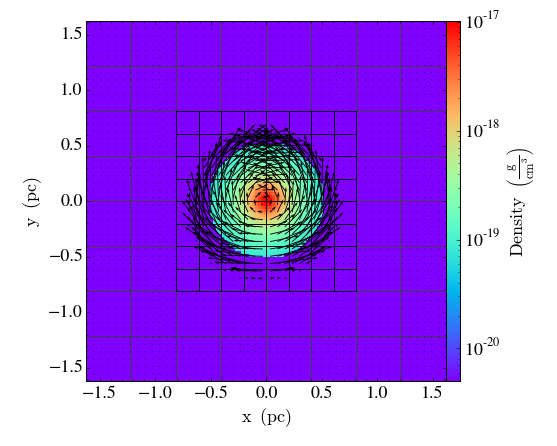


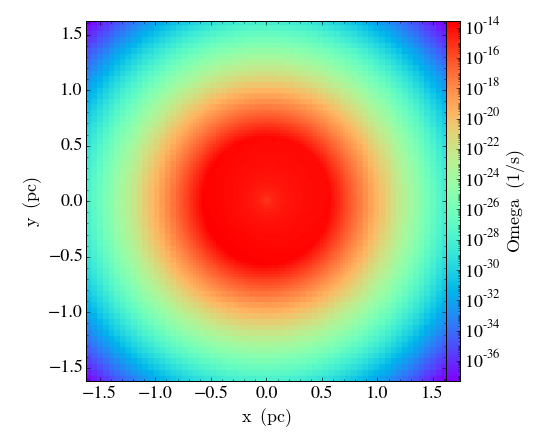

In [7]:
plot_dens(0,grid=True,velocity=True)
plot_omega(0)

The direction curl is not correct


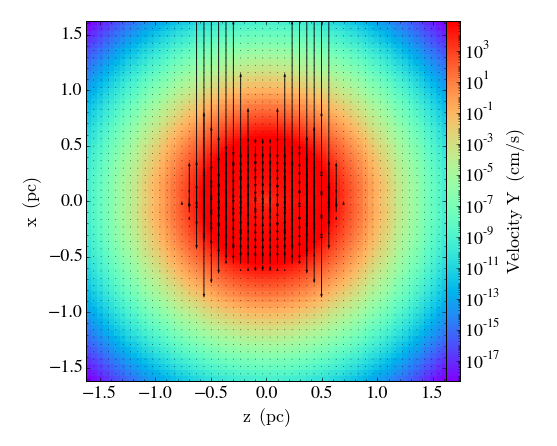

In [16]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velocity_y"
slc = yt.SlicePlot(ds, "y",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()


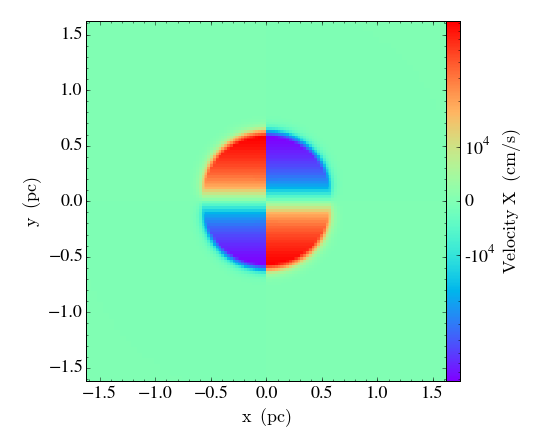

In [13]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velocity_x"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
# slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()

The reason why the velocity_x direction is screwed up is because rr needs to be absolute valued

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



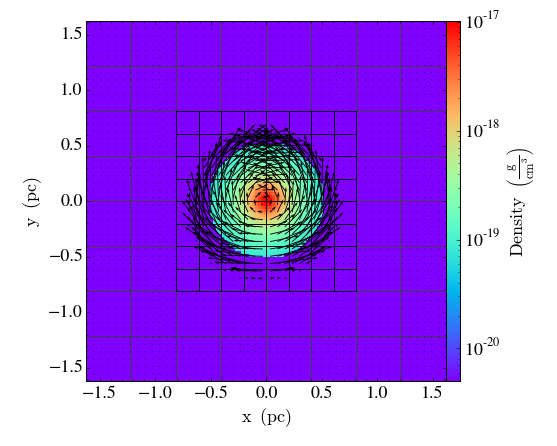


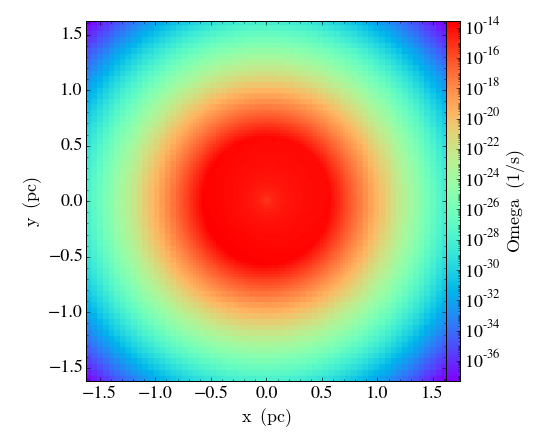

In [7]:
plot_dens(0,grid=True,velocity=True)
plot_omega(0)

by printing out the vy and phi values there does look like there's negative vy values '


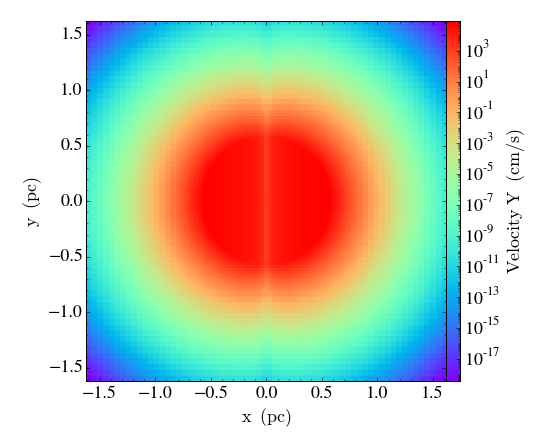

In [10]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velocity_y"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
# slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()


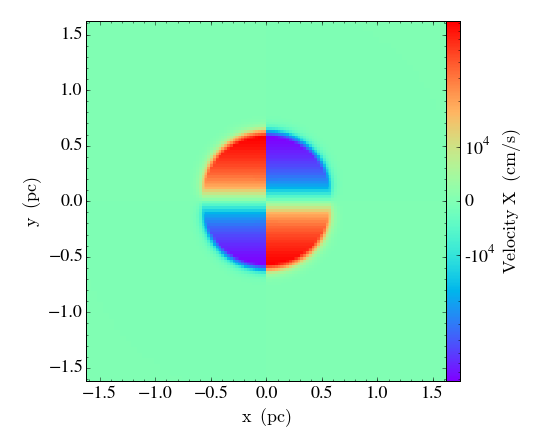

In [9]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velocity_x"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
# slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()

##### Okay fixed it, much better now....

##### this is $\beta = 0.01$ 


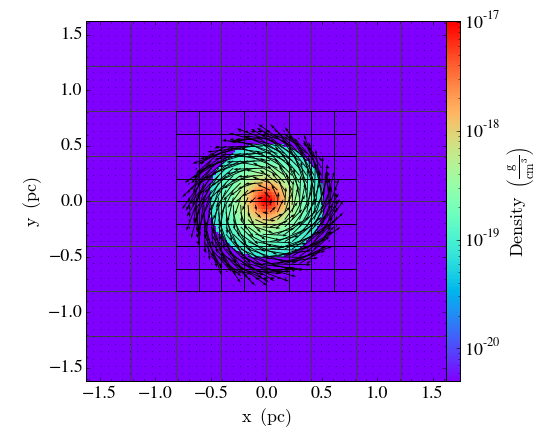


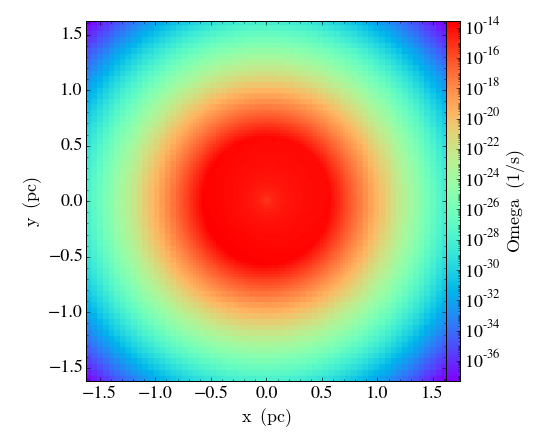

In [11]:
plot_dens(0,grid=True,velocity=True)
plot_omega(0)


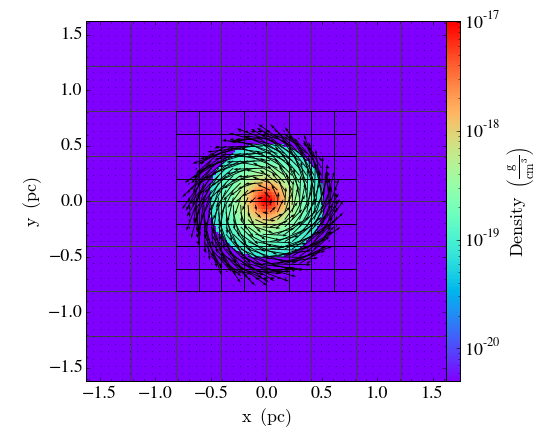


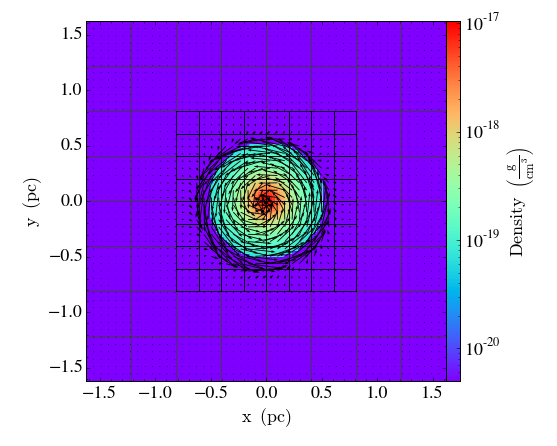


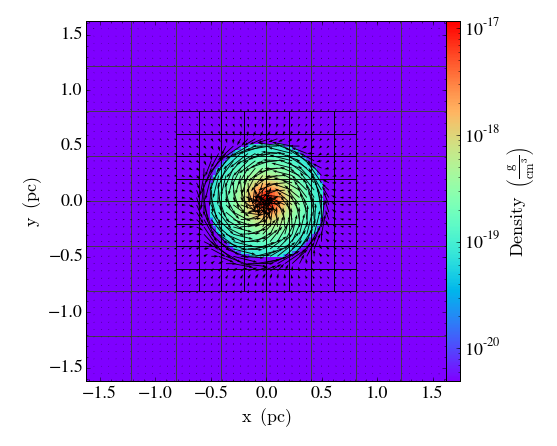


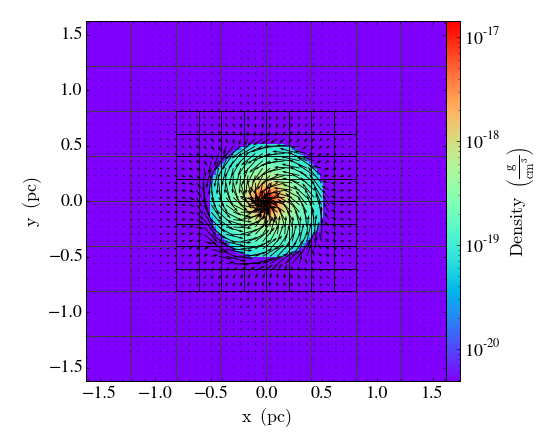


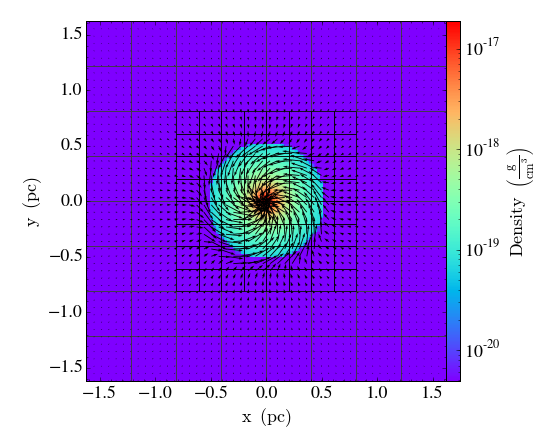


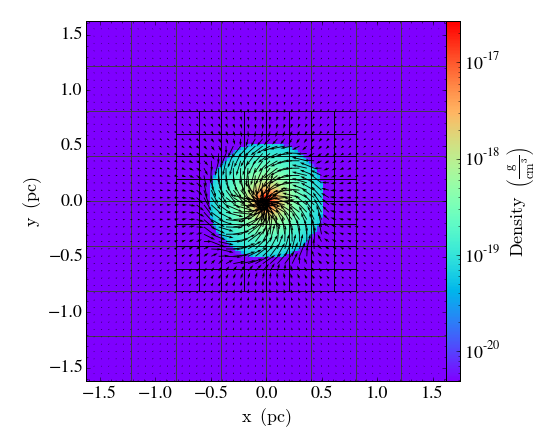


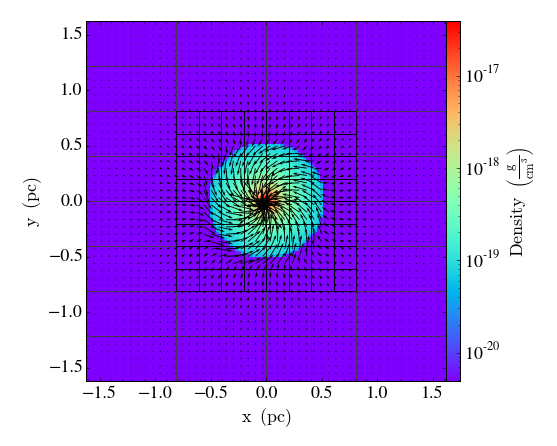


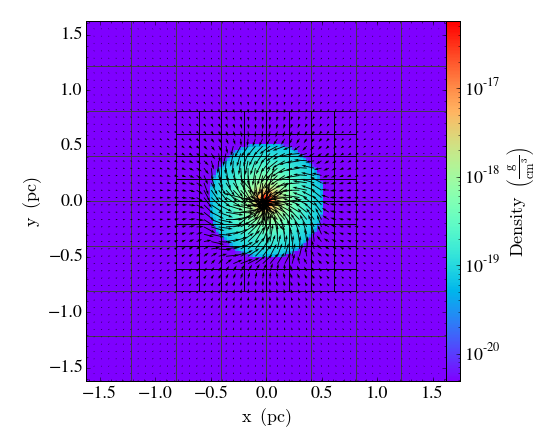


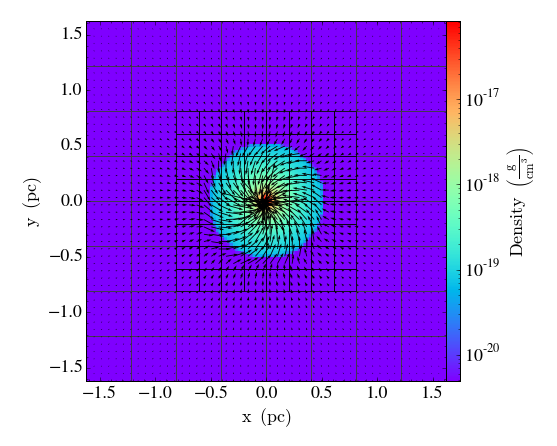


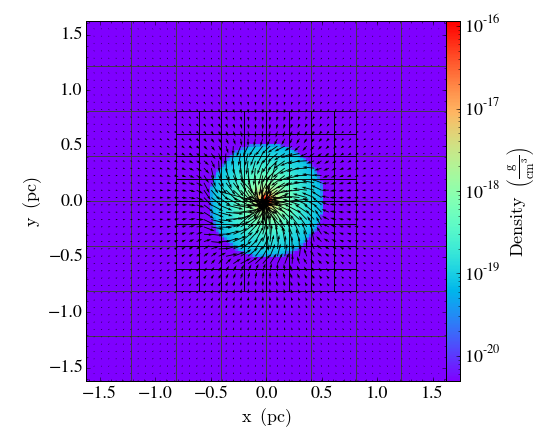


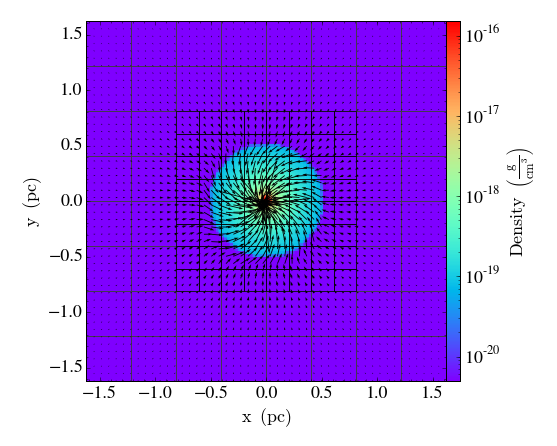

In [14]:
END_TIME = 54
for i in np.arange(END_TIME):
    if i%5==0:
        plot_dens(i,grid=True,velocity=True)

##### for $\beta=0.1$, it crashed  in 8 timesteps( 559934.out)

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



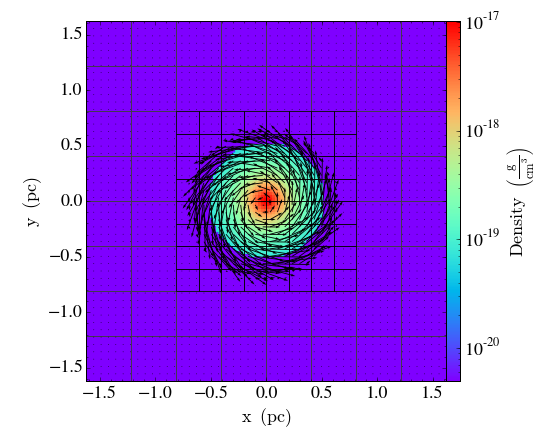


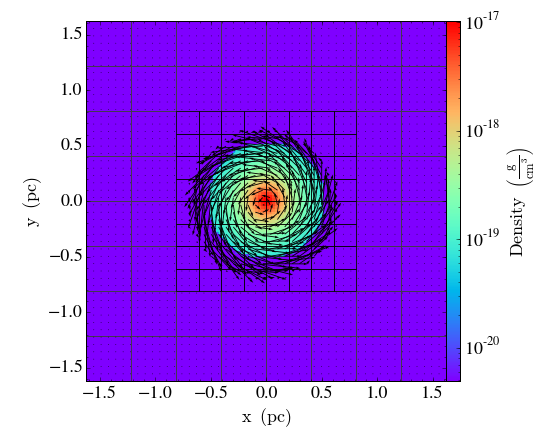


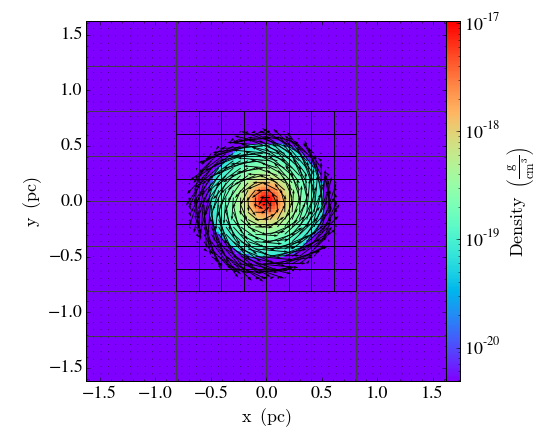


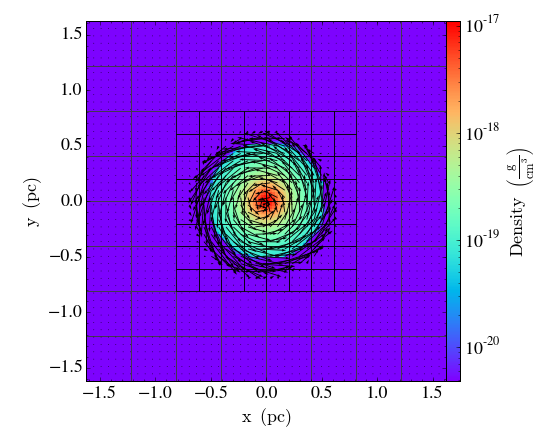

In [7]:
plot_dens(1,grid=True,velocity=True)
plot_dens(3,grid=True,velocity=True)
plot_dens(5,grid=True,velocity=True)
plot_dens(8,grid=True,velocity=True)

##### for $\beta=0.3$, crashed at first time step

In [8]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
data = ds.all_data()
print np.mean(data["omega"])

1.79588239264e-15 1/s


In [10]:
compute_omega(0.1)

1.489835301529451e-13

crashed at first timestep